# <center>Laboratorium 10<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, uzupełnić plik main.py, wykonać test na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.polynomial import polynomial as P

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych lub inaczej mówiąc metodami znajdowania miejsc zerowych funkcji.
W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$, należy wyznaczyć argumenty funkcji $x$, dla których $f(x) = 0$ (funkcja jest równa zero). 

Argumenty $x^*$, dla których $f(x)=0$ nazywamy *pierwiastkami*.

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Dany jest wielomian postaci $W(x)=(x-1)(x-2)\cdot \ldots \cdot (x-20)$.

1. Zdefinuj funkcję *polly_A*, która obliczy współczynniki wielomianu $a_i$ w postaci ogólnej wielomianu $w(x)=a_nx^n+\ldots +a_2x^2+a_1x+1$. Skonstruuj wektor tych współczynników. Użyj funkcji [polyfromroots](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html#numpy.polynomial.polynomial.polyfromroots) oraz *linspace*.
2. Zdefinuj funkcję *roots_20*, która w pętli 20 iteracji będzie:  

   i. konstruować wektor współczynników nowego wielomianu w następujący sposób: do każdego wygenerowanego wektora współczynników dodać losową wartość w postaci $(10^{-10})N(0,1)$. Użyj funkcji [random_sample](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).  
  ii. wyliczyać pierwiaski tego wielomianu za pomocą metody [polyroots](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyroots.html#numpy.polynomial.polynomial.polyroots).

3. Narysuj na wykresie te pierwiastki (w każdej iteracji dorysowywać pierwiastki na tym samym rysunku).
4. Określić, który pierwiastek jest najbardziej wrażliwy na zaburzenia.
5. Zaproponować sposób oszacowania uwarunkowania każdego z pierwiastków.

C:\Program Files\Python39\lib\site-packages\matplotlib\collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


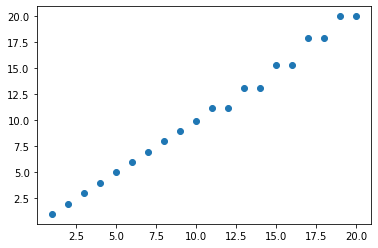

In [14]:
W = np.linspace(1, 20, 20)

poly = main.polly_A(W)

iteration_roots = []

for i in range(21):
    coeff,sample_roots = main.roots_20(poly)
    iteration_roots.append(sample_roots)
    poly = coeff

roots = np.array(iteration_roots)
plt.scatter(W, sample_roots)

Text(0.5, 0, 'Pierwiastek')

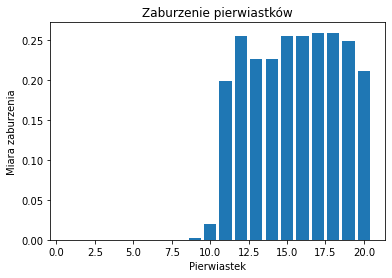

In [11]:
x = np.linspace(1,20,20)
dev = []
for col in range(roots.shape[0] - 1):
    dev.append(np.std(roots[:,col]))

plt.bar(x,dev)
plt.title("Zaburzenie pierwiastków")
plt.ylabel("Miara zaburzenia")
plt.xlabel("Pierwiastek")

1. Pierwiastki od 1 do 9 nie podlegają zaburzeniom.
2. Najbardziej zaburzony wydaje się być pierwiastek 18.
3. Sprawdzić moduł różnicy wartości wielomianu o niezaburzonym i zaburzonym pierwiastku badanym.

***Zadanie 2.***  
Dany jest wielomian $w_1(x)=(x-1)^8$. Wyznacz numerycznie miejsca zerowego tego wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa. W związku z tym wykonaj następujące czynności:  

1. Zaiplementuj funkcję tworzącą [macierz Frobenusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf) *frob_a*, dla zadanego wektora współczynników wielomianu $w(x)$.  
2. Wyznacz wartości własne przekształconej macierzy za pomocą funkcji [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals).  
3. Dokonaj rozkładu Schura macierzy zdefiniowanej w punkcie 1. użyj funkcji [schure](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur).  
4. Porównaj wyniki z funkcją polyroots.

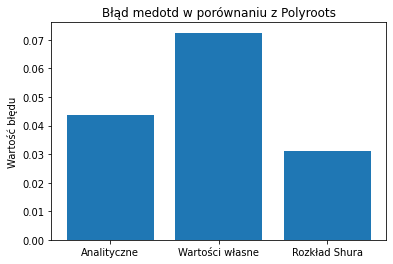

Uwarunkowanie macierzy Frobeniusa - cond =  12869.999922299921


In [15]:
W = np.ones(8)
poly = main.polly_A(W)

frob_matrix, eig, shur, poly_from = main.frob_a(poly[:-1])

x = np.arange(3)
roots = np.sort(P.polyroots(poly))
error_norms = [np.linalg.norm(roots - W), np.linalg.norm(roots - np.sort(eig)), np.linalg.norm(roots - np.sort(np.diag(shur[0])))]

plt.bar(x, error_norms)
plt.xticks(x, ('Analityczne', 'Wartości własne', 'Rozkład Shura'))
plt.title("Błąd medotd w porównaniu z Polyroots")
plt.ylabel("Wartość błędu")
plt.show()
print(f"Uwarunkowanie macierzy Frobeniusa =  {np.linalg.cond(frob_matrix)}")

Wyniki są do siebie zbliżone. Spory błąd może wynikać ze złego uwarunkowania macierzy Frobeniusa.

***Zadanie 3.***  
Dla danego wielomianu $w_2(x) = 243x^7-486x^6+783x^5-990x^4+558x^3-28x^2-72x+16$ wyznacz miejsca zerowe numerycznie, w taki sam sposób jak w zadaniu 2.

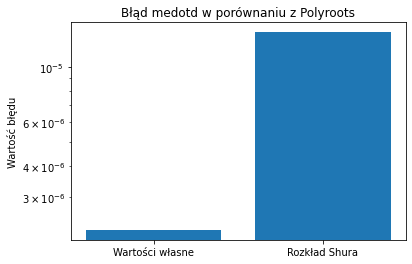

Uwarunkowanie macierzy Frobeniusa - cond =  567.3907272580342


In [16]:
W = np.array([16, -72, -28, 558, -990, 783, -486, 243])
poly = W / 243

frob_matrix, eig, shur, poly_from = main.frob_a(poly[:-1])

shur = scipy.linalg.schur(frob_matrix, output='complex')

x = np.arange(2)
roots = np.sort(P.polyroots(poly))
error_norms = [np.linalg.norm(roots - np.sort(eig)), np.linalg.norm(roots - np.sort(np.diag(shur[0])))]

plt.bar(x, error_norms)
plt.xticks(x, ('Wartości własne', 'Rozkład Shura'))
plt.title("Błąd metod w porównaniu z Polyroots")
plt.ylabel("Wartość błędu")
plt.yscale('log')
plt.show()

print(f"Uwarunkowanie macierzy Frobeniusa - cond =  {np.linalg.cond(frob_matrix)}")

Metody generują podobne wyniki, uwarunkowanie macierzy Frobeniusa w tym przypadku także jest spore.

***Zadanie 4.***

Dany jest wielomian: 
$$
w_3(x)= x^5 - 156x^4 - 5x^3 + 780x^2 + 4x - 624
$$.
 Wiedząc, że wielomian ten w postaci szeregu Czebyszewa jest następujący 
 $$w_3(x)= (a_0+\frac{a_2}{2}+ \frac{3a_4}{4})T_0(x)+(a_1+\frac{3a_3}{4}+ \frac{5a_5}{8})T_1(x)+(\frac{a_2}{2}+ \frac{a_4}{4})T_2(x)+(\frac{a_3}{4}+ \frac{5a_5}{16})T_3(x)+ (\frac{a_4}{8})T_4 + (\frac{a_5}{16})T_5(x)$$ 
 znajdź pierwiastki wykorzystując funkcję [chebroots](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebroots.html).

In [17]:
def w3(a, x):
    return a[5] * x**5 + a[4] * x**4 + a[3] * x**3 + a[2] * x**2 + a[1] * x + a[0]

In [18]:
a = np.array([-624, 4, 780, -5, -156, 1])
a = np.flip(a)
roots =np.sort(P.polyroots(a))

coef = np.array([a[0] + a[2] / 2 + 3 * a[4] / 4, a[1] + 3 * a[3] /4 + 5 * a[5] / 8, a[2]/2 + a[4]/4, a[3]/4 + 5*a[5]/16,a[4]/8, a[5]/16])
cheb_roots = np.sort(np.polynomial.chebyshev.chebroots(coef))


[1.42108547e-13 4.26325641e-14 5.55111512e-16 0.00000000e+00
 2.84217094e-13] [0.50213639 1.98334657 2.4989902  2.0175818  0.49786285]


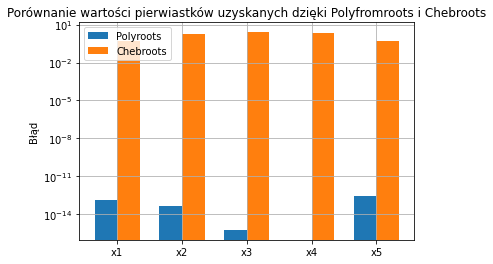

In [19]:
labels = ['x1', 'x2', 'x3', 'x4', 'x5']

roots_from_polyfromroots = w3(a, roots)
roots_from_cheb = w3(a, cheb_roots)

root1 = np.abs(roots_from_polyfromroots)
root2 = np.abs(roots_from_cheb)
print(root1, root2)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, root1, width, label='Polyroots')
rects2 = ax.bar(x + width/2, root2, width, label='Chebroots')

plt.yscale("log")
ax.set_ylabel('Błąd')
ax.set_title('Porównanie wartości pierwiastków uzyskanych dzięki Polyfromroots i Chebroots')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid()

plt.show()

Najlepsza znów okazała się metoda Polyroots, która jest dokładniejsza nawet o kilkanaście rzędów wielkości od Chebroots.
